### **1. Introduction**

We want to create a Monte Carlo simulation, where you pick a number between one number and another, and based on that, find the long-term probability of randomly selecting that number.

Inspiration = https://pub.towardsai.net/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8

### **2. Import libraries**

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt

### **3. Create a Random Number Function**

This function will randomly choose a number within a range based on the minimum and maximum outer bounds the user gives it.

In [19]:
def random_number(minimum, maximum): #choose a random number in the range you chose
    return random.randint(minimum, maximum)

In [20]:
random_number(-10000, 1000000) #test the random number picker

535116

### 4. Create and Run a Monte Carlo Function

We will create and run a monte carlo function which tells the user to enter a range of numbers to randomly select from (maximum and minimum), a number within that range (num), and the number of times to randomly select within that range (iterations). We find the theoretical long-term probability of choosing num within the minimum-maximum range, and we test to see if over time, through iterations, we approach that theoretical probability.

In [39]:
prob_dct = {} #List will store probability values

def monte_carlo(minimum, maximum, num, iterations):
    if num > maximum or num < minimum or minimum >= maximum or (maximum-minimum < 10) or iterations < 10:
        print('Input a minimum that is less than the maximum by at least 10, and a number between these two numbers.')
        return 'N/A'
    
    results = 0
    
    for i in range(iterations):
        rand_number = random_number(minimum, maximum)
        #print(rand_number, "vs", num)
        if rand_number == num: 
            results += 1
        elif rand_number != num:
            results += 0
        
        prob_value = results/(i+1) #Calculating probability value
        
        prob_dct[i] = prob_value #Append probability values to dictionary
        
    #Plot results
    plt.axhline(1/(maximum-minimum), color='r', linestyle='-')
    plt.xlabel('Iterations')
    plt.ylabel('Probability')
    
    lists = sorted(prob_dct.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.show()
    

    return results/(iterations) #return final long-run probability

### 6. Run the Monte Carlo simulation

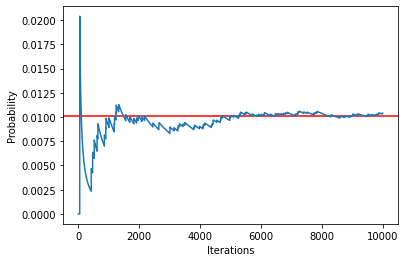

0.0104

In [52]:
monte_carlo(minimum=1, maximum=100, num=5, iterations=10000)

* The above Monte Carlo simulation essentially asks pick a number between 1 and 100 (we chose 5); we will pick a random number between 1 and 100 for 10,000 iterations, and measure how often the number within the range is chosen. Theoretically, it would be chosen 1% of the time (1/100), which is where we draw the red line. In the early iterations, the long-run probabily had been higher due to 5 having been randomly selected more often than what may have been expected; but given the law of large numbers, probably after 5,000 or so iterations, the experimental hit rate of selecting 5 when randomly choosing between the bounds of 1 and 100 approached the theoretical probability of 1%, 1.04% to be exact. We would only expect the most minor of variability as time were to go on.


* Let's go further - how often would each number in the range be chosen? What would that distrbution look like?

In [70]:
lst = []

import seaborn as sns

def monte_carlo_hist(minimum, maximum, iterations):
    if minimum >= maximum or (maximum-minimum < 10) or iterations < 10:
        print('Input a minimum that is less than the maximum by at least 10.')
        return 'N/A'
    
    results = 0
    
    for i in range(iterations):
        rand_number = random_number(minimum, maximum)
        lst.append(rand_number) #Append probability values to list
        
    #Plot results
    plt.axhline(1/(maximum-minimum), color='orange', linestyle='-')
    plt.xlabel('Number Range')
    plt.ylabel('Probability Density')
    sns.distplot(lst)
    #plt.hist(lst, bins=100, density=True)
    plt.show()

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


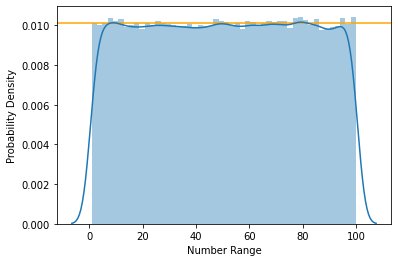

In [72]:
monte_carlo_hist(minimum=1, maximum=100, iterations=100000)

* We have translated the original line graph to a probability density function histogram (a seaborn distplot), which illustrates the probability of each value within the number range over a given amount of iterations. As you can see, even with the excessive binning we teach the function, each value essentially ends up being randomly picked at the theoretical frequency of 1%.


* There are many other mathematical proabilities and dilemmas that can be tested, but what is depicted above is the crux of the matter; understanding the theoretical/mathematical likelihood of the problem, and experimenting against that likelihood.